In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data = pd.read_csv(r"C:\Users\Ashik\Desktop\diabetes.csv")

In [59]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


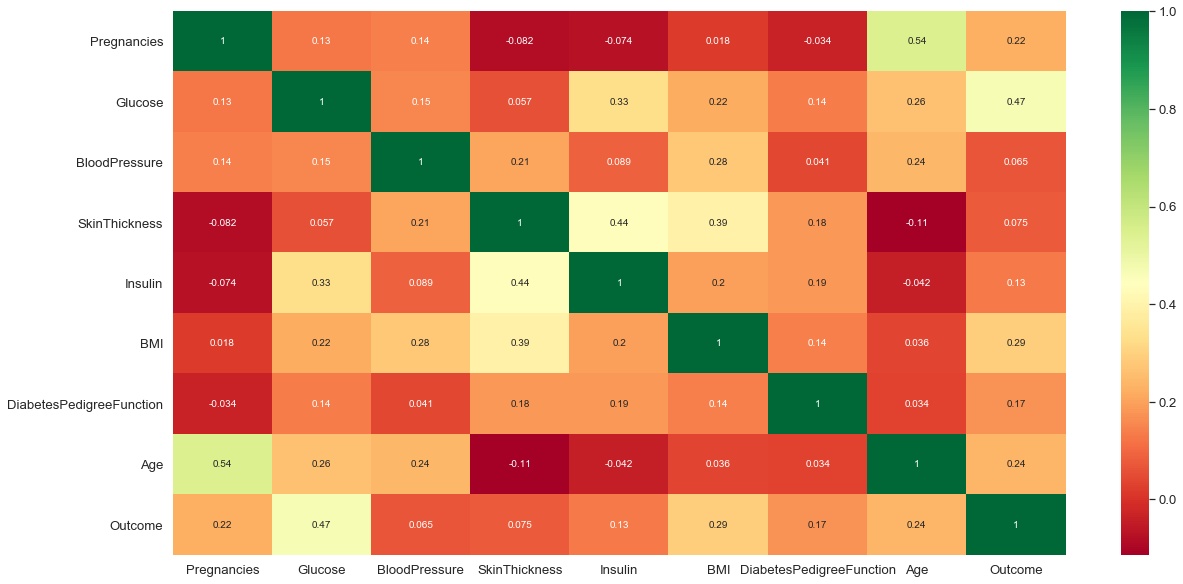

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [62]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']
predicted_class = ['Outcome']

X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [63]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['Age'] == 0])))

total number of rows : 768
number of rows missing Pregnancies: 111
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 227
number of rows missing bmi: 374
number of rows missing diab_pred: 0
number of rows missing age: 11
number of rows missing skin: 0


In [64]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [65]:
## Apply Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())
predict_train_data = random_forest_model.predict(X_test)

In [66]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.749


In [67]:
from sklearn import metrics

print("Precision = {0:.3f}".format(metrics.precision_score(y_test, predict_train_data)))

Precision = 0.754


In [68]:
from sklearn import metrics

print("Recall = {0:.3f}".format(metrics.recall_score(y_test, predict_train_data)))

Recall = 0.494


C:\Users\Ashik\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[118  12]
 [ 26  36]]
Normalized confusion matrix
[[0.91 0.09]
 [0.42 0.58]]


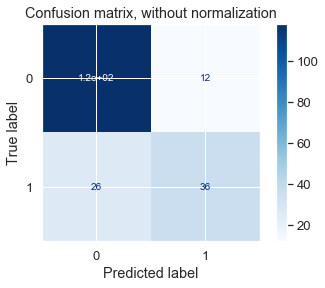

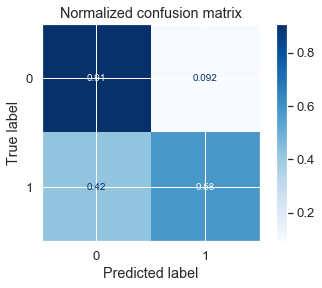

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
data = pd.read_csv(r"C:\Users\Ashik\Desktop\diabetes.csv")
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']
predicted_class = ['Outcome']

X = data[feature_columns].values
y = data[predicted_class].values

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

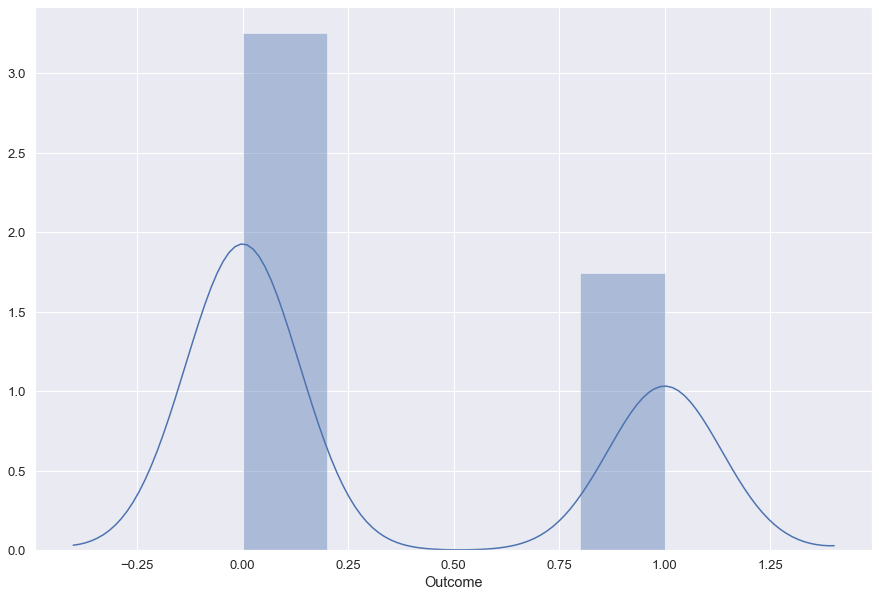

In [70]:
w=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
q=data[['Outcome']].values
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Outcome'])

In [71]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
categorical_ = data.iloc[:,:2]
numerical_ = data.iloc[:,2:]
numerical_.head()

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,72,35,0,33.6,0.627,50,1
1,66,29,0,26.6,0.351,31,0
2,64,0,0,23.3,0.672,32,1
3,66,23,94,28.1,0.167,21,0
4,40,35,168,43.1,2.288,33,1


In [72]:
X = numerical_.iloc[:,:-1]
y = numerical_.iloc[:,-1]
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_training_set)
x_training_set = scaler.transform(x_training_set)
x_test_set = scaler.transform(x_test_set)
y_training_set = y_training_set.values.reshape(-1, 1)
y_test_set  = y_test_set.values.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaler.fit(y_training_set)
y_training_set = y_scaler.transform(y_training_set)
y_test_set = y_scaler.transform(y_test_set)
model = linear_model.LinearRegression()
model.fit(x_training_set,y_training_set)
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
print(" coefficient of determination R^2 of the prediction.: ",model_score)
y_predicted = model.predict(x_test_set)
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

 coefficient of determination R^2 of the prediction.:  0.18366795568153782
Mean squared error: 1.02
Test Variance score: -0.02


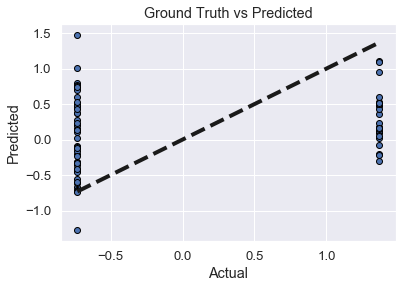

In [74]:
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [75]:
a=np.array(data)
b=a[:,8]
da=np.column_stack((data.Pregnancies,data.Glucose,data.BloodPressure,data.SkinThickness,data.Insulin,data.BMI,data.DiabetesPedigreeFunction,data.Age))
da.shape
print(da),(b)

[[  6.   148.    72.   ...  33.6    0.63  50.  ]
 [  1.    85.    66.   ...  26.6    0.35  31.  ]
 [  8.   183.    64.   ...  23.3    0.67  32.  ]
 ...
 [  5.   121.    72.   ...  26.2    0.24  30.  ]
 [  1.   126.    60.   ...  30.1    0.35  47.  ]
 [  1.    93.    70.   ...  30.4    0.32  23.  ]]


(None,
 array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
     

In [76]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(da,b)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
clf.predict([[1,111,70,45,543,30.5,2.158,53]])

array([0.])

In [78]:
# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(5,30)
yy= a * xx - (clf.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane
# that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

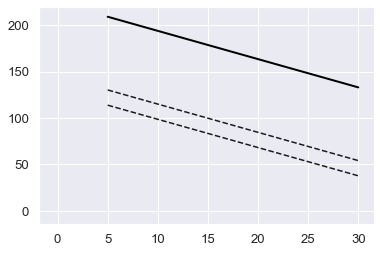

In [79]:
# Look at the margins and support vectors
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')

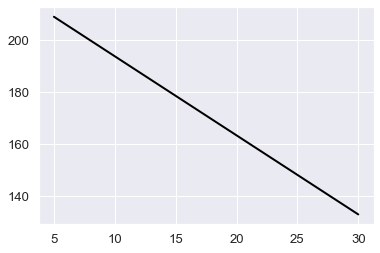

In [80]:
# Plot the hyperplane
plt.plot(xx, yy, linewidth=2, color='black')